# Prática 02: Convolução (FIltragem)

* Preparação do ambiente

In [86]:
import numpy as np
import matplotlib.pyplot as plt

### Questão 01:
Gere um sinal que é a soma de duas funções seno com frequências angulares iguais a 
0,1π e 0,8π; amplitudes iguais a 1 e 1,2; e fases iniciais iguais a π/3 e π/4, 
respectivamente, ou seja:
 x[n] = sen(0,1.π.n + π/3) + 1,2.sen(0,8.π.n + π/4). 



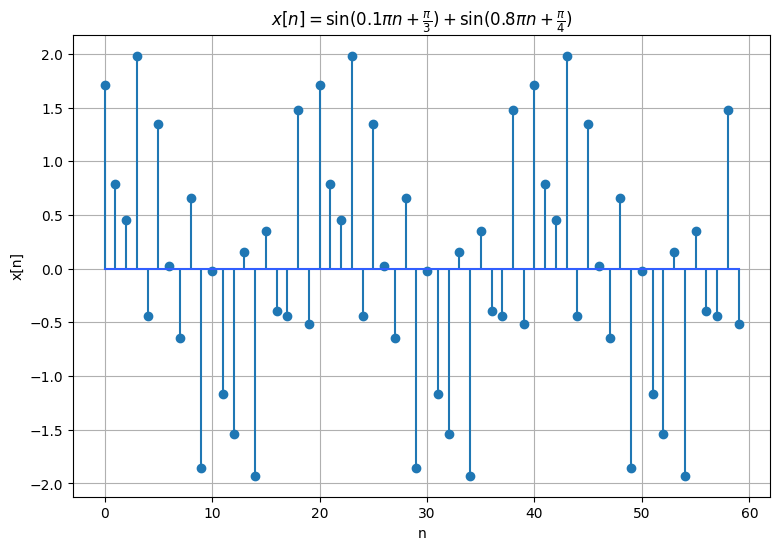

In [87]:
#Definindo as amostras e criando uma variável para o número pi
n_samples = np.arange(0,60)
pi = np.pi

#definindo as duas funções seno
sen1 = 1 * np.sin(0.1 * pi * n_samples + pi/3)
sen2 = 1.2 * np.sin(0.8 * pi * n_samples + pi/4)

#função x definida na questão
def x(n) -> list[float]:
    return sen1 + sen2

x_n = x(n_samples)

#Plotando o gráfico
plt.figure(figsize=(9,6))
plt.stem(n_samples, x_n, basefmt="#325fff")

#Estilizações
plt.title(r"$x[n]= \sin(0.1 \pi n + \frac{\pi}{3}) + \sin(0.8 \pi n + \frac{\pi}{4})$")
plt.xlabel("n")
plt.ylabel("x[n]")

plt.grid(True)
plt.show()


### Questão 02:
Gere uma resposta ao impulso de um sistema LIT dada por: 
h[n] = sen(0,45 π (n-20))/(π (n-20)), para 0<= n <= 40, para n diferente de 20,
 h[n] = 0,45, para n=20.
 h[n] = 0, caso contrário,
 Gere o gráfico desta resposta ao impulso [sin,figure,stem].

[]

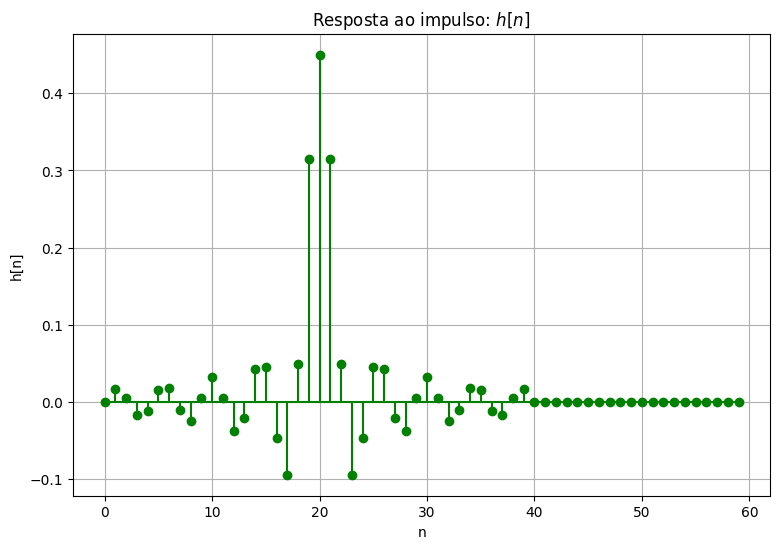

In [88]:
def h(n)->float:
    if n == 20:
        return 0.45
    elif 0<= n <= 40:
        return np.sin(0.45 * pi * (n-20)) / (pi * (n-20))
    return 0

h_n = [h(n) for n in n_samples]
#Plotando o gráfico
plt.figure(figsize=(9,6))
plt.stem(n_samples, h_n, basefmt="g", linefmt="g")

#Estilizações
plt.title("Resposta ao impulso: $h[n]$")
plt.xlabel("n")
plt.ylabel("h[n]")

plt.grid(True)
plt.plot()



### Questão 3:
Filtre o sinal de questão 1 usando a resposta ao impulso gerada na questão 2. Gere o 
gráfico deste sinal filtrado [conv,figure,plot]. 

In [99]:
def convolution(x, h, n_samples):
    
    y = np.zeros_like(len(n_samples), dtype="float")

    for n in range(n_samples):
        result = 0
        for k in n_samples:
            result += x[k] * x[n-k]
        y[n] = result

    return y

In [ ]:
def filter(x, h):
    return np.convolve(x, h, mode="same");

#filteredSignal = filter(x_n, h_n)
filteredSignal = convolution(x_n, h_n, n_samples)

#Plotando o gráfico
plt.figure(figsize=(9,6))
plt.stem(n_samples, filteredSignal, linefmt="#11388e", basefmt="#11388e")

#Estilizações
plt.title("Sinal $x[n]$ filtrado por $h[n]$")
plt.xlabel("n")
plt.ylabel("$x[n] * h[n]$")

plt.grid(True)
plt.plot()

TypeError: only integer scalar arrays can be converted to a scalar index

: 